In [4]:
import cv2 #opencv读取的格式是BGR
import numpy as np
import matplotlib.pyplot as plt#Matplotlib是RGB
%matplotlib inline 

In [8]:
img=cv2.imread('img/cat.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

### 图像阈值

#### ret, dst = cv2.threshold(src, thresh, maxval, type)

- src： 输入图，只能输入单通道图像，通常来说为灰度图
- dst： 输出图
- thresh： 阈值
- maxval： 当像素值超过了阈值（或者小于阈值，根据type来决定），所赋予的值
- type：二值化操作的类型，包含以下5种类型： cv2.THRESH_BINARY； cv2.THRESH_BINARY_INV； cv2.THRESH_TRUNC； cv2.THRESH_TOZERO；cv2.THRESH_TOZERO_INV

- cv2.THRESH_BINARY           超过阈值部分取maxval（最大值），否则取0
- cv2.THRESH_BINARY_INV    THRESH_BINARY的反转
- cv2.THRESH_TRUNC            大于阈值部分设为阈值，否则不变
- cv2.THRESH_TOZERO          大于阈值部分不改变，否则设为0
- cv2.THRESH_TOZERO_INV  THRESH_TOZERO的反转


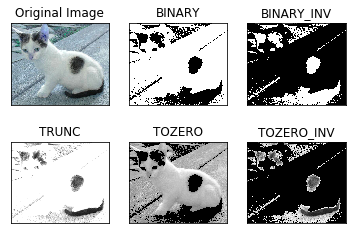

In [10]:
ret, thresh1 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

### 图像平滑
- 平滑 也称 模糊, 是一项简单且使用频率很高的图像处理方法。
- 平滑处理的用途有很多， 但是在本教程中我们仅仅关注它减少噪声的功用 (其他用途在以后的教程中会接触到)。
- 平滑处理时需要用到一个 滤波器 。滤波器的种类有很多， 这里仅仅提及最常用的 

In [11]:
#带噪音的原图
img = cv2.imread('img/lenaNoise.png')

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
# 均值滤波
# 简单的平均卷积操作
blur = cv2.blur(img, (3, 3))

cv2.imshow('blur', blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
# 方框滤波
# 基本和均值一样，可以选择归一化,容易越界
box = cv2.boxFilter(img,-1,(3,3), normalize=True)  

cv2.imshow('box', box)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
# 高斯滤波
#最有用的滤波器 (尽管不是最快的)。 高斯滤波是将输入数组的每一个像素点与 高斯内核 卷积将卷积和当作输出像素值。
# 高斯模糊的卷积核里的数值是满足高斯分布，相当于更重视中间的
aussian = cv2.GaussianBlur(img, (5, 5), 1)  

cv2.imshow('aussian', aussian)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
# 中值滤波
#中值滤波将图像的每个像素用邻域 (以当前像素为中心的正方形区域)像素的 中值 代替 。
#i: 内核大小 (只需一个值，因为我们使用正方形窗口)，必须为奇数。
median = cv2.medianBlur(img, 5)  # 中值滤波

cv2.imshow('median', median)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
# 展示所有的
res = np.hstack((blur,aussian,median))
#print (res)
cv2.imshow('median vs average', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 形态学
形态学（形态学）常应用在生物学中，研究动植物的形态和结构;

图像处理中的形态学操作用于图像预处理操作(去噪 形状简化) 图像增强(骨架提取 细化  凸包  物体标记)  物体背景分割及物体形态量化等场景

常见图像形态学运算：腐蚀，膨胀，开运算，闭运算，骨架抽取，极线腐蚀，击中击不中变换，顶帽变换，颗粒分析，流域变换，形态学梯度等;

最基本的形态学操作是：膨胀（扩张）和腐蚀（侵蚀）;


#### 腐蚀操作
原理：局部最小值（与膨胀相反）;

    ①定义一个卷积核B，核可以是任何的形状和大小
    ②将核与图像进行卷积，计算核乙覆盖区域的像素点最小值;
    ③将这个最小值赋值给参考点指定的像素;

void erode(  
    InputArray src,  
    OutputArray dst,  
    InputArray kernel,  
    Point anchor=Point(-1,-1),  
    int iterations=1,  
    int borderType=BORDER_CONSTANT,  
    const Scalar& borderValue=morphologyDefaultBorderValue()  
 );  
 
    第一个参数，InputArray类型的src，输入图像
    第二个参数，OutputArray类型的dst，即目标图像，需要和源图片有一样的尺寸和类型。
    第三个参数，InputArray类型的kernel，腐蚀操作的内核。若为NULL时，表示的是使用参考点位于中心3x3的核。我们一般使用函数 getStructuringElement配合这个参数的使用。getStructuringElement函数会返回指定形状和尺寸的结构元素（内核矩阵）。
    第四个参数，Point类型的anchor，锚的位置，其有默认值（-1，-1），表示锚位于单位（element）的中心，我们一般不用管它。
    第五个参数，int类型的iterations，迭代使用erode（）函数的次数，默认值为1。
    第六个参数，int类型的borderType，用于推断图像外部像素的某种边界模式。注意它有默认值BORDER_DEFAULT。
    第七个参数，const Scalar&类型的borderValue，当边界为常数时的边界值，有默认值morphologyDefaultBorderValue()，一般我们不用去管他。需要用到它时，可以看官方文档中的createMorphologyFilter()函数得到更详细的解释。

In [22]:
img = cv2.imread('img/dige.png')

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
kernel = np.ones((3,3),np.uint8) 
erosion = cv2.erode(img,kernel,iterations = 1)

cv2.imshow('erosion', erosion)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [24]:
pie = cv2.imread('img/pie.png')

cv2.imshow('pie', pie)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
kernel = np.ones((30,30),np.uint8) 
erosion_1 = cv2.erode(pie,kernel,iterations = 1)
erosion_2 = cv2.erode(pie,kernel,iterations = 2)
erosion_3 = cv2.erode(pie,kernel,iterations = 3)
res = np.hstack((erosion_1,erosion_2,erosion_3))
cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 膨胀
原理：求局部最大值;
实现方法：

    ①定义一个卷积核B，核可以是任何的形状和大小，
    ②将核与图像进行卷积，计算核乙覆盖区域的像素点最大值;
    ③将这个最大值赋值给参考点指定的像素;


void dilate(  
    InputArray src,  
    OutputArray dst,  
    InputArray kernel,  
    Point anchor=Point(-1,-1),  
    int iterations=1,  
    int borderType=BORDER_CONSTANT,  
    const Scalar& borderValue=morphologyDefaultBorderValue()   
);  

    第一个参数，InputArray类型的src，输入图像
    第二个参数，OutputArray类型的dst，即目标图像，需要和源图片有一样的尺寸和类型。
    第三个参数，InputArray类型的kernel，膨胀操作的核。若为NULL时，表示的是使用参考点位于中心3x3的核。
    第四个参数，Point类型的anchor，锚的位置，其有默认值（-1，-1），表示锚位于中心。
    第五个参数，int类型的iterations，迭代使用erode（）函数的次数，默认值为1。
    第六个参数，int类型的borderType，用于推断图像外部像素的某种边界模式。注意它有默认值BORDER_DEFAULT。
    第七个参数，const Scalar&类型的borderValue，当边界为常数时的边界值，有默认值morphologyDefaultBorderValue()，一般我们不用去管他。

In [26]:
kernel = np.ones((3,3),np.uint8) 
pie = cv2.imread('img/pie.png')

kernel = np.ones((30,30),np.uint8) 
dilate_1 = cv2.dilate(pie,kernel,iterations = 1)
dilate_2 = cv2.dilate(pie,kernel,iterations = 2)
dilate_3 = cv2.dilate(pie,kernel,iterations = 3)
res = np.hstack((dilate_1,dilate_2,dilate_3))
cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

膨胀和腐蚀的主要用途：

- 消除噪声;
- 分割出独立的图像元素，在图像中连接相邻的元素;
- 寻找图像中明显的极大值或极小值区;
- 求出图像的梯度;

#### 开运算闭运算
开操作可以平滑物体轮廓，断开狭窄的间断和消除细小的突出物。它具有消除细小物体，在纤细处分离物体和平滑较大物体边界的作用。
闭操作可以消弭狭窄的间断，消除小的孔洞。先膨胀后腐蚀的操作称之为闭操作。它具有填充物体内细小空洞，连接邻近物体和平滑边界的作用。

#### 通常当有噪音的图像用阈值二值化后，得到的边界很不平滑，物体区域有一些空洞，背景区域有一些小的噪音物体，连续的开运算和闭运算可以有很好的改善

void morphologyEx(  
InputArray src,  
OutputArray dst,  
int op,  
InputArraykernel,  
Pointanchor=Point(-1,-1),  
intiterations=1,  
intborderType=BORDER_CONSTANT,  
constScalar& borderValue=morphologyDefaultBorderValue() );  
    第一个参数，InputArray类型的src，输入图像
    第二个参数，OutputArray类型的dst，即目标图像，函数的输出参数，需要和源图片有一样的尺寸和类型。
    第三个参数，int类型的op，表示形态学运算的类型，可以是如下之一的标识符：
    MORPH_DILATE – 膨胀
    MORPH_ERODE – 腐蚀
    MORPH_OPEN – 开运算（Opening operation）
    MORPH_CLOSE – 闭运算（Closing operation）
    MORPH_GRADIENT -形态学梯度（Morphological gradient）
    MORPH_TOPHAT - “顶帽”（“Top hat”）
    MORPH_BLACKHAT - “黑帽”（“Black hat“）
    第四个参数，InputArray类型的kernel，形态学运算的内核。若为NULL时，表示的是使用参考点位于中心3x3的核。我们一般使用函数 getStructuringElement配合这个参数的使用。
    第五个参数，Point类型的anchor，锚的位置，其有默认值（-1，-1），表示锚位于中心。
    第六个参数，int类型的iterations，迭代使用函数的次数，默认值为1。
    第七个参数，int类型的borderType，用于推断图像外部像素的某种边界模式。注意它有默认值BORDER_ CONSTANT。
    第八个参数，const Scalar&类型的borderValue，当边界为常数时的边界值，有默认值morphologyDefaultBorderValue()，一般我们不用去管他。需要用到它时，可以看官方文档中的createMorphologyFilter()函数得到更详细的解释。

In [27]:
# 开：先腐蚀，再膨胀
img = cv2.imread('img/dige.png')

kernel = np.ones((5,5),np.uint8) 
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

cv2.imshow('opening', opening)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [28]:
# 闭：先膨胀，再腐蚀
img = cv2.imread('img/dige.png')

kernel = np.ones((5,5),np.uint8) 
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

cv2.imshow('closing', closing)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 梯度运算

In [29]:
# 梯度=膨胀-腐蚀
pie = cv2.imread('img/pie.png')
kernel = np.ones((7,7),np.uint8) 
dilate = cv2.dilate(pie,kernel,iterations = 5)
erosion = cv2.erode(pie,kernel,iterations = 5)

res = np.hstack((dilate,erosion))

cv2.imshow('res', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [30]:
gradient = cv2.morphologyEx(pie, cv2.MORPH_GRADIENT, kernel)

cv2.imshow('gradient', gradient)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 礼帽与黑帽
- 礼帽 = 原始输入-开运算结果
- 黑帽 = 闭运算-原始输入

In [31]:
#礼帽
img = cv2.imread('img/dige.png')
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
cv2.imshow('tophat', tophat)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [32]:
#黑帽
img = cv2.imread('img/dige.png')
blackhat  = cv2.morphologyEx(img,cv2.MORPH_BLACKHAT, kernel)
cv2.imshow('blackhat ', blackhat )
cv2.waitKey(0)
cv2.destroyAllWindows()